# Read data

In [1]:
import pandas as pd

file_path = 'D:/VScode/Paleoclimate_causality/data_last_deglaciation_T_CO2/data_for_plots.xlsx'

df_wdc_co2 = pd.read_excel(file_path, sheet_name='WDC CO2', skiprows=1)
df_wdc_d18o = pd.read_excel(file_path, sheet_name='WDC d18O', skiprows=3)

# remove nan values for all three dataframes
df_wdc_co2 = df_wdc_co2.dropna()
df_wdc_d18o = df_wdc_d18o.dropna()



# rename columns to Age,Value
df_wdc_co2.columns = ['Age', 'Value', 'Error']
df_wdc_d18o.columns = ['Age', 'Value']


# drop values in the second column of df_wdc_d18o that above 999
df_wdc_d18o = df_wdc_d18o[df_wdc_d18o.iloc[:, 1] < 999]



In [14]:
df_wdc_co2.info

<bound method DataFrame.info of           Age   Value  Error
0     8806.73  267.90   3.37
1     8900.03  265.45   1.43
2     8995.02  268.86   1.42
3     9091.10  263.95   1.85
4     9188.26  270.60   3.85
..        ...     ...    ...
656  65530.00  210.15   0.48
657  65911.80  210.32   0.53
658  66332.96  211.87   0.86
659  66729.17  212.07   0.80
660  67187.42  209.87   1.74

[661 rows x 3 columns]>

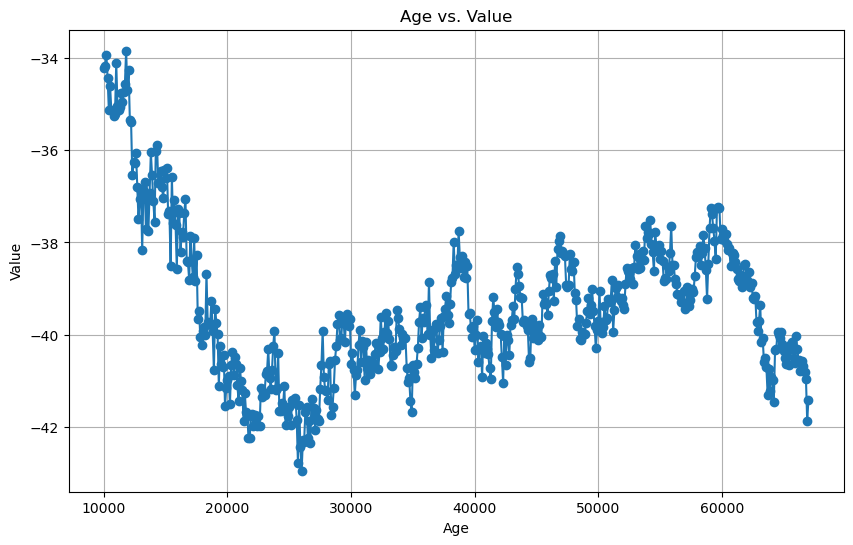

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Step 2: Convert DataFrame to ndarray and interpolate
age_values = df_wdc_d18o['Age'].to_numpy()
value_values = df_wdc_d18o['Value'].to_numpy()

# Interpolate using numpy interp
new_age_range = np.arange(10000, 67001, 100)
new_value_range = np.interp(new_age_range, age_values, value_values)

# Create a new DataFrame with resampled values
df_d18o_resampled = pd.DataFrame({
    'Age': new_age_range,
    'Value': new_value_range
})

# Step 3: Plot Age vs. Value
plt.figure(figsize=(10, 6))
plt.plot(df_d18o_resampled['Age'], df_d18o_resampled['Value'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Age vs. Value')
plt.grid(True)
plt.show()


In [6]:
df_d18o_resampled

,Age,Value
0,10000,-34.212586
1,10100,-34.178719
2,10200,-33.930953
3,10300,-34.421747
4,10400,-35.117740
...,...,...
566,66600,-40.675618
567,66700,-40.813880
568,66800,-40.965920
569,66900,-41.863517


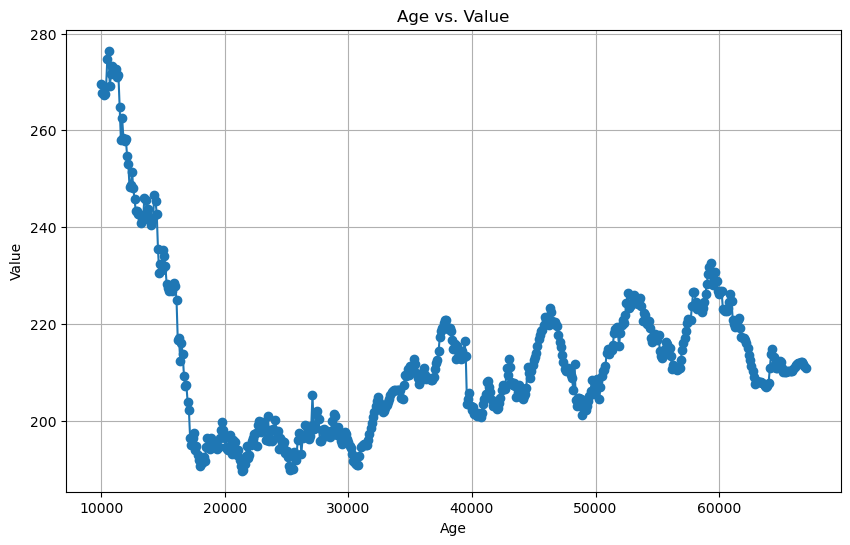

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Step 2: Convert DataFrame to ndarray and interpolate
age_values = df_wdc_co2['Age'].to_numpy()
value_values = df_wdc_co2['Value'].to_numpy()

# Interpolate using numpy interp
new_age_range = np.arange(10000, 67001, 100)
new_value_range = np.interp(new_age_range, age_values, value_values)

# Create a new DataFrame with resampled values
df_co2_resampled = pd.DataFrame({
    'Age': new_age_range,
    'Value': new_value_range
})

# Step 3: Plot Age vs. Value
plt.figure(figsize=(10, 6))
plt.plot(df_co2_resampled['Age'], df_co2_resampled['Value'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Age vs. Value')
plt.grid(True)
plt.show()


<Axes: >

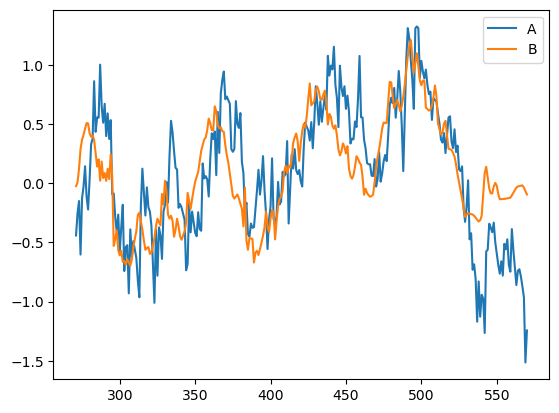

In [64]:
df_data = pd.DataFrame({
    'A': df_d18o_resampled['Value'].values,
    'B': df_co2_resampled['Value'].values
})

# normalize the column 'A' and 'B' using z-score normalization
df_data['A'] = (df_data['A'] - df_data['A'].mean()) / df_data['A'].std()
df_data['B'] = (df_data['B'] - df_data['B'].mean()) / df_data['B'].std()

# filp the columns upside down
df_data = df_data[::-1]

# crop the first 1000 rows
df_data = df_data.iloc[0:300]
# df_data = df_data.iloc[400:]

# plot
df_data.plot()
# reverse the x-axis
# plt.gca().invert_xaxis()

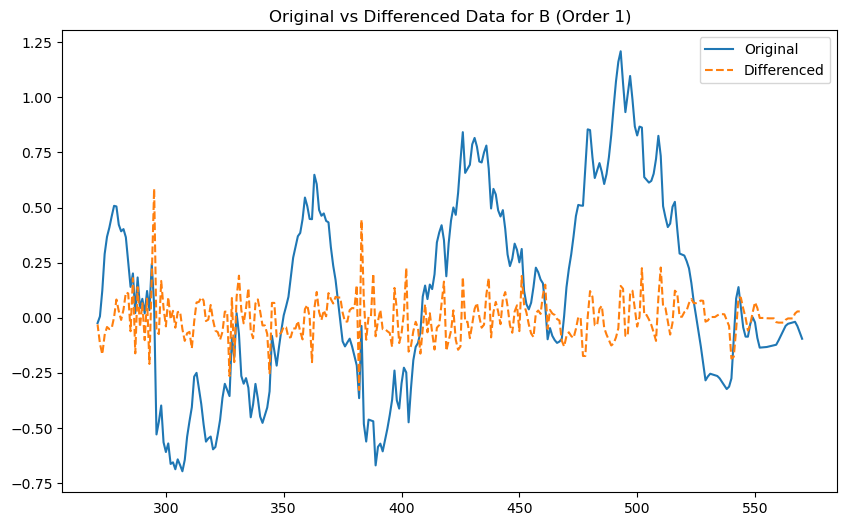

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
A => B    3.044               0.001                10                True
B => A    14.056               0.000                1                True



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


'Granger Causality Test\n------------------------------------------------------------\nDirection                   F-statistics         p-value         lag         Granger cause\nA => B    3.044               0.001                10                True\nB => A    14.056               0.000                1                True\n'

In [65]:
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

df_data_checked = GC.make_stationary(df_data,['A', 'B'], test_method='ADF', plot=True)
GC.gc_test(df_data_checked, 'A','B', max_lags=10)